# TA-Lib Integration

TA-Lib stands for Technical Analysis Library and it is a great collection of technical indicators that are extensively used for quatitative trading.
To install TA-Lib please follow the guidlines in this link: https://mrjbq7.github.io/ta-lib/install.html
Note that currently there are problems with installing this library for Python 3.7. If you run this version of Python you should setup a virtual environment with a lower version, as explained here: https://docs.python.org/3/tutorial/venv.html.
If you are using Anaconda, you could use:
`conda install -c quantopian ta-lib`
However, if your Anaconda/Python version is 3.7 and above you can create a conda environment with a lower Python version as described here: https://mlpipes.com/changing-the-python-version-in-conda/

This notebook will show you some use cases for TA-Lib, which you can apply to your quantitative trading strategies. 
Let's first import TA-Lib, Numpy and Matplotlib as well as the Pandas-Datareader to get market data.

In [1]:
import talib

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd

Now, let's first download some market data. Note that the Pandas Datareader returns them as a dataframe. What we get here are open/high/low/close __(OHLC)__ data also called candlesticks. 

In [3]:
# Downloading some market data
aapl = pdr.get_data_yahoo('AAPL')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-20,128.119995,125.169998,125.570000,127.599998,47054300.0,117.425117
2015-04-21,128.199997,126.669998,128.100006,126.910004,32435100.0,116.790138
2015-04-22,128.869995,126.320000,126.989998,128.619995,37654500.0,118.363777
2015-04-23,130.419998,128.139999,128.300003,129.669998,45770900.0,119.330048
2015-04-24,130.630005,129.229996,130.490005,130.279999,44525900.0,119.891411


Let's first have a look at the data by plotting them.

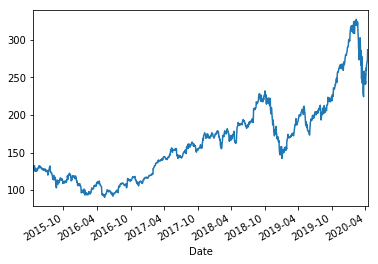

In [4]:
aapl['Close'].plot();

We see a typical price curve as expected. Let's now use TA-Lib to plot a simple 200-day moving average of the close prices:

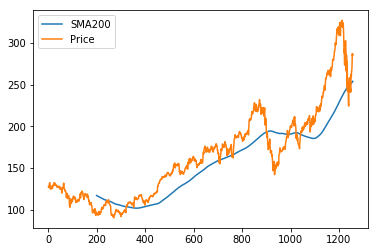

In [5]:
sma200 = talib.SMA(aapl['Close'].values, 200)
plt.plot(sma200,label='SMA200')
plt.plot(aapl['Close'].values,label='Price')
plt.legend(loc='best');

That was simple, but the question is, how do we know what parameters to use? We could do the following:
`?talib.SMA` which opens up a docstring explaining the function:

In [6]:
?talib.SMA

Once we run this we can see that it takes an array as input and an integer for the time period, which is our lookback. We can also see that our SMA starts only after a certain period. This delay is actually the lookback. Any data point that has less than 200 days of pervious data (in our case) will receive a NaN rather than a value.

That's great, but what other functions are available on TA-Lib? Let's find out with the next line:

In [7]:
dir(talib)

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

In [8]:
len(dir(talib))

176

We can see that there are well over 100 different technical indicators. Some of them may be familiar to you, others probably not. To find out the meaning of them, please refer to this Github page: https://mrjbq7.github.io/ta-lib/
You can then use the question mark notation to drill further into the function.
You will notice that a lot of indicator names start with __CDL__. These are specific candlestick (CDL) patterns that TA-Lib can recognise. Take, for example, the __CDLDOJI__ pattern, which is described here: https://www.investopedia.com/terms/d/doji.asp.
Let's see if this pattern exists in our series. First we need to find out the required inputs with `?talib.CDLDOJI` and find that it requires OHLC data and returns either -100, 0 or +100.

In [9]:
?talib.CDLDOJI

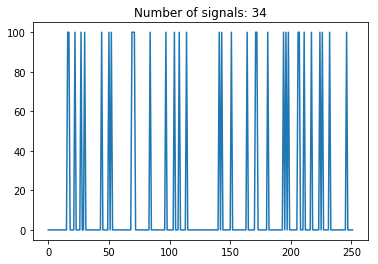

In [10]:
doji = talib.CDLDOJI(aapl['Open'].values, aapl['High'].values, aapl['Low'].values, aapl['Close'].values)
num_signals = sum(doji[:252]>0)
plt.plot(doji[:252]);
plt.title('Number of signals: %s'%num_signals);

We can see that within the course of one year between May 2015 and April 2016 we get 33 signals.

Some indicators return multiple values such as the Bollinger Band indicator or BBANDS. Let's see what it's got `?talib.BBANDS`
We can see that it outputs upperband, middleband and lowerband. Another typical and well-know example of this would be the MACD indicator.

In [11]:
?talib.BBANDS

In [12]:
upperband, middleband, lowerband = talib.BBANDS(aapl['Close'].values, 100, 1, 1)

The next graph tells us that our price mostly oscillates within 3 standard deviations away from the average price.

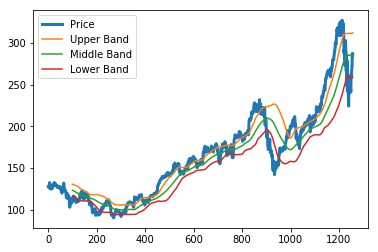

In [13]:
plt.plot(aapl['Close'].values,lw=3,label='Price')
plt.plot(upperband,label='Upper Band')
plt.plot(middleband,label='Middle Band')
plt.plot(lowerband,label='Lower Band')
plt.legend(loc='best');

We could visualise this in a different way, where our price oscillates around the average price:

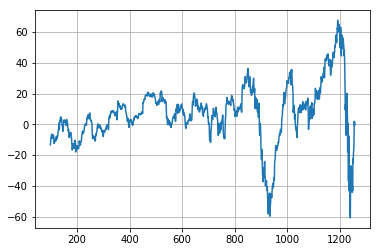

In [14]:
plt.plot(aapl['Close'].values - middleband)
plt.grid()

Now, let's combine some indicators to create an new one. In this example we generate the normlised difference between two moving averages. This is actually very similar to the MACD, but here we go. You might recall that the difference between two moving averages can indicate an up or down trend, depending of the sign of that value. However, we want to normalise it in order to account for large differences in prices between different assets in order to make it more universal. Let's do that:

In [15]:
sma50 = talib.SMA(aapl['Close'].values,50)
sma100 = talib.SMA(aapl['Close'].values,100)
# Normalisation
sma_diff = (sma50-sma100)/sma50

The next plot shows our two moving averages together with the price curve. When our 50-day moving average is above the 100-day MA we are more likely in an uptrend and vice versa. 

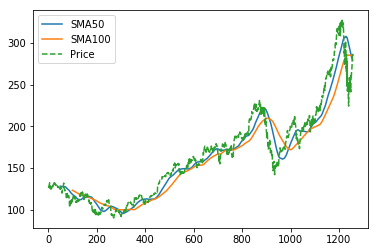

In [16]:
plt.plot(sma50,label='SMA50')
plt.plot(sma100,label='SMA100')
plt.plot(aapl['Close'].values,'--',label='Price');
plt.legend(loc='best');

In the next plot we can see that during a large move such as the drop at the end of 2018, our new indicator shows a deeply negative value.

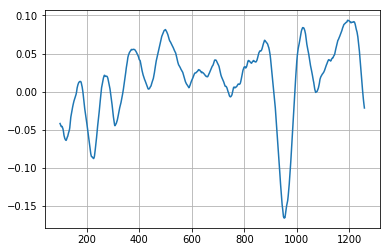

In [17]:
plt.plot(sma_diff)
plt.grid();

Does our moving average indicator predict up-and down trends well, the next plot suggests, actually not. It lags badly and we are often too late to the party. This is a well-known property of moving averages.
However, what's important here is that you understand the process. I hope this will inspire you to play around and find good opportunities yourself.

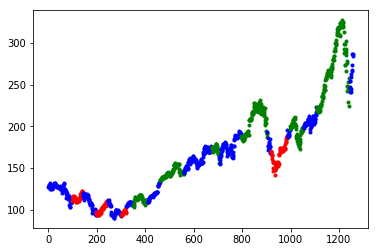

In [18]:
for i in range(len(aapl)):
    if sma_diff[i] > 0.03:
        plt.plot(i, aapl['Close'].values[i], 'g.')
    elif sma_diff[i] < -0.03:
        plt.plot(i, aapl['Close'].values[i], 'r.')
    else:
        plt.plot(i, aapl['Close'].values[i], 'b.')

### Calculating path-independent performance

In [19]:
def get_fwd_rets(ret_wdw):
    fwd_rets = ((aapl['Close'].iloc[ret_wdw:].values-
                aapl['Close'].iloc[:-ret_wdw].values)
                /aapl['Close'].iloc[:-ret_wdw].values)
    return fwd_rets

In [21]:
ret_wdw = 30
fwd_rets = get_fwd_rets(ret_wdw)
pnls = np.sign(sma_diff[101:-ret_wdw])*fwd_rets[101:]
print('Final PnL: %.2f'%(np.sum(pnls)/ret_wdw))

Final PnL: 0.26


### PnL distribution

596

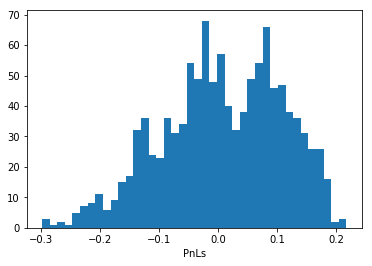

In [22]:
plt.hist(pnls, 40)
plt.xlabel('PnLs')
len(pnls[pnls>0])

### Calculating position size

In [33]:
sign = np.sign(sma_diff[101:-ret_wdw])

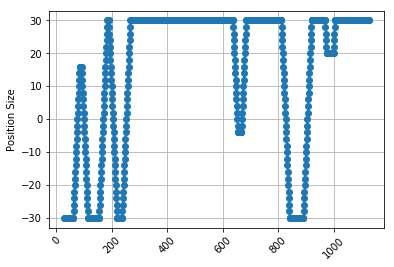

In [44]:
plt.plot(pd.Series(sign).rolling(ret_wdw).sum(), '-o')
plt.grid()
plt.xticks(rotation=45)
plt.ylabel('Position Size');

### Calculating cumulative PnL

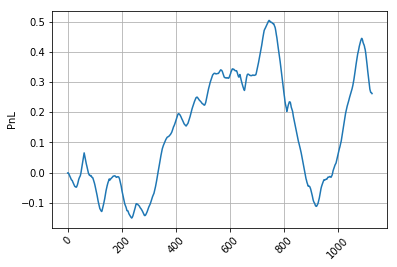

In [48]:
plt.plot(np.cumsum(pnls)/ret_wdw, '-')
plt.ylabel('PnL')
plt.xticks(rotation=45);
plt.grid();